Громыко Артём Артурович Б9122-02.03.01сцт Вариант 6 (чет.)

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
def norm(x):
    return np.sqrt(sum([x[i] ** 2 for i in range(len(x))]))

In [330]:
def solve_jacobi(A, b, v0, epsilon): 
    """
    Метод Якоби
    """

    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    x0, x1 = v0, None
    index = 0

    indexes, vec_vals, norms = [0], [v0], [None]

    while True:
        x1 = np.zeros(n)

        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x0[j]
            x1[i] = (b[i] - s) / A[i, i]

        index += 1

        indexes.append(index)
        vec_vals.append(np.round(x1, 3))
        norms.append(norm(x1 - x0))

        if norm(x1 - x0) < epsilon:
            break

        x0 = x1

    return np.round(x1, 4), index, pd.DataFrame({'x^k': vec_vals, '||x^k - x^k+1||': norms}, index=indexes)

In [331]:
def solve_relaxation(A, b, v0, omega, epsilon): 
    """
    Метод Релаксации
    """

    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    x0, x1 = v0, None
    index = 0

    indexes, vec_vals, norms = [0], [v0], [None]

    while True:
        x1 = omega * b

        for i in range(n):
            s = 0
            for j in range(i):
                s += A[i, j] * x1[j]
            x1[i] -= omega * s

            s = 0
            for j in range(i + 1, n):
                s += A[i, j] * x0[j]
            x1[i] -= omega * s

            x1[i] += (1 - omega) * x0[i] * A[i, i]

            x1[i] /= A[i, i]

        index += 1

        indexes.append(index)
        vec_vals.append(np.round(x1, 3))
        norms.append(norm(x1 - x0))

        if norm(x1 - x0) < epsilon:
            break

        x0 = x1

    return np.round(x1, 4), index, pd.DataFrame({'x^k': vec_vals, '||x^k - x^k+1||': norms}, index=indexes)

In [332]:
A = np.array([
    [6.22, 1.42, -1.72, 1.91], 
    [1.42, 5.33, 1.11, -1.82], 
    [-1.72, 1.11, 5.24, 1.42],
    [1.91, -1.82, 1.42, 6.55]
])

b = np.array([7.53, 6.06, 8.05, 8.06])

epsilon = 0.0001

v0 = [1, 1, 1, 1]

In [333]:
# Решаем данные СЛАУ методом Якоби
x, index_jacobi, df = solve_jacobi(A, b, v0, epsilon)
print(f'Сошлось с заданной точностью за {index_jacobi} итераций\nРешение: {x}')
df

Сошлось с заданной точностью за 35 итераций
Решение: [1.2874 0.6936 1.6233 0.696 ]


,x^k,||x^k - x^k+1||
0,"[1, 1, 1, 1]",NaN
1,"[0.952, 1.004, 1.382, 1.0]",0.384733
2,"[1.056, 0.937, 1.365, 0.932]",0.142308
3,"[1.088, 0.89, 1.432, 0.887]",0.098852
4,"[1.131, 0.852, 1.465, 0.85]",0.075673
5,"[1.16, 0.821, 1.497, 0.82]",0.061191
6,"[1.185, 0.796, 1.521, 0.796]",0.049130
7,"[1.205, 0.776, 1.541, 0.776]",0.039615
8,"[1.221, 0.76, 1.557, 0.761]",0.031903
9,"[1.234, 0.747, 1.57, 0.748]",0.025705


In [334]:
# Решаем данные СЛАУ методом Верхней релаксации
x, index, df = solve_relaxation(A, b, v0, 1.5, epsilon)
print(f'Сошлось с заданной точностью за {index} итераций\nРешение: {x}')
df

Сошлось с заданной точностью за 16 итераций
Решение: [1.2876 0.6934 1.6234 0.6958]


,x^k,||x^k - x^k+1||
0,"[1, 1, 1, 1]",NaN
1,"[0.928, 1.035, 1.526, 0.875]",0.546482
2,"[1.228, 0.669, 1.578, 0.637]",0.531877
3,"[1.334, 0.671, 1.7, 0.671]",0.165495
4,"[1.315, 0.657, 1.621, 0.682]",0.083578
5,"[1.292, 0.704, 1.629, 0.704]",0.057758
6,"[1.281, 0.693, 1.614, 0.698]",0.022197
7,"[1.286, 0.698, 1.625, 0.697]",0.013331
8,"[1.287, 0.691, 1.623, 0.695]",0.007412
9,"[1.289, 0.694, 1.625, 0.696]",0.003747


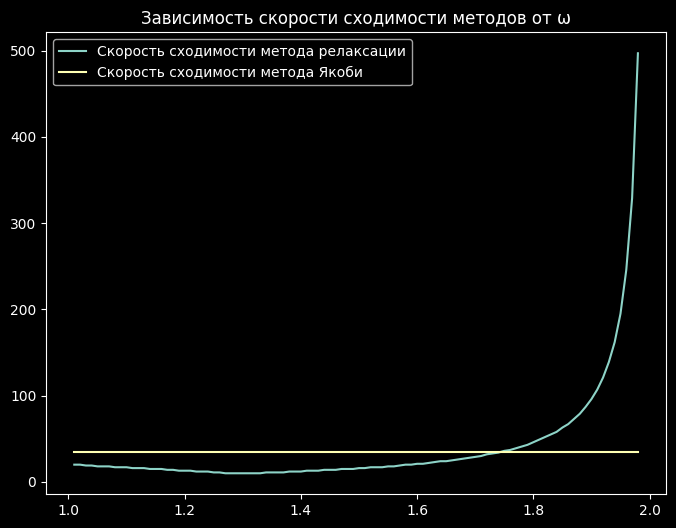

In [335]:
Y = []
X = np.arange(1.01, 1.99, 0.01)
for omega in X:
    x, index, df = solve_relaxation(A, b, v0, omega, epsilon)
    Y.append(index)

plt.figure(figsize=(8, 6))

plt.plot(X, Y, label='Скорость сходимости метода релаксации')
plt.plot(X, [index_jacobi] * len(X), label='Скорость сходимости метода Якоби')

plt.title('Зависимость скорости сходимости методов от ω')

plt.legend()

plt.show()

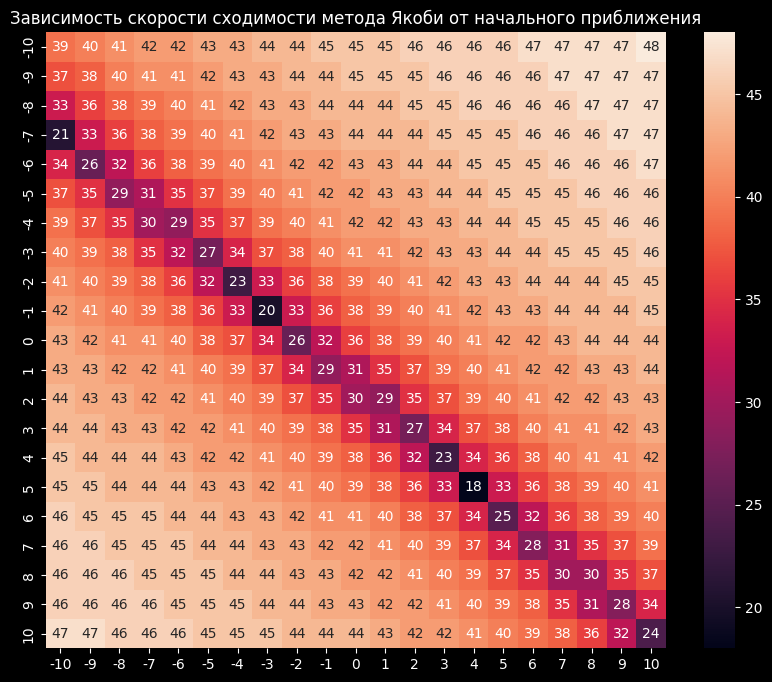

In [336]:
plt.figure(figsize=(10, 8))

data = np.zeros((21, 21), int)

for x in np.arange(-10, 11, 1):
    for y in np.arange(-10, 11, 1):
        data[int(x + 10), int(y + 10)] = solve_jacobi(A, b, np.array([x, y, 1, 1]), epsilon)[1]

df = pd.DataFrame(data)

plt.title('Зависимость скорости сходимости метода Якоби от начального приближения')

sns.heatmap(df, 
            xticklabels=df.columns - 10, 
            yticklabels=df.columns - 10, 
            annot=True)
plt.show()

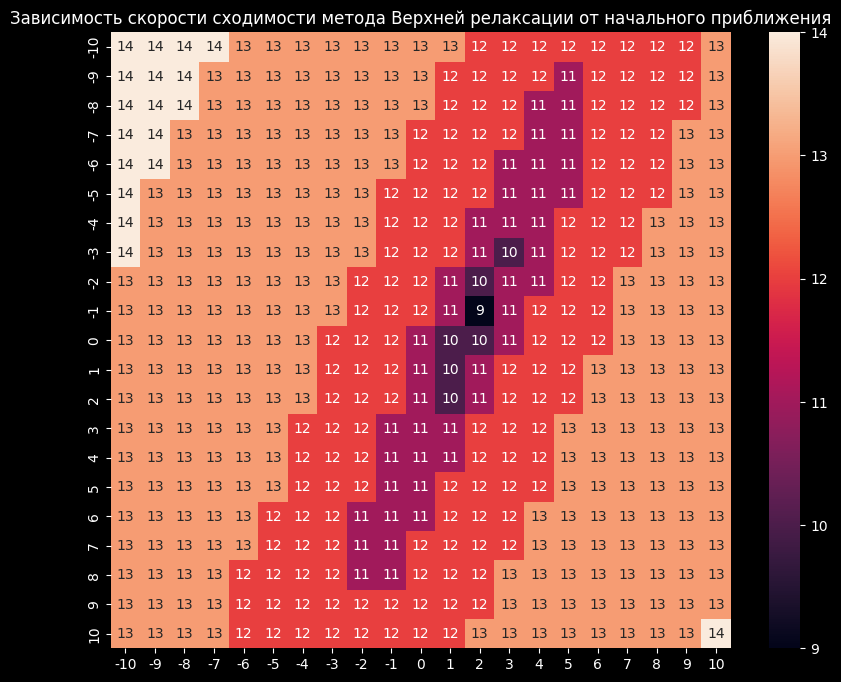

In [337]:
plt.figure(figsize=(10, 8))

data = np.zeros((21, 21), int)

for x in np.arange(-10, 11, 1):
    for y in np.arange(-10, 11, 1):
        data[int(x + 10), int(y + 10)] = solve_relaxation(A, b, np.array([x, y, 1, 1]), 1.3, epsilon)[1]

df = pd.DataFrame(data)

plt.title('Зависимость скорости сходимости метода Верхней релаксации от начального приближения')

sns.heatmap(df, 
            xticklabels=df.columns - 10, 
            yticklabels=df.columns - 10, 
            annot=True)
plt.show()

Для данной матрици метод верхней релаксации показывает лучшую скорость сходимости, нежели метод Якоби, на широком спектре начальных приближений и значений параметра $\omega$